### 统计作业在事件表中开始和结束时间

In [1]:
import pandas as pd
import datetime
import time
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'

In [11]:
d_list = ['181022', '181023', '181024', '181025', '181026', '181027', '181028', '181029', '181030', \
         '181031', '181101', '181102', '181103', '181104',\
         '181105', '181106', '181107', '181108', '181109', '181110', '181111']

day_all = ['180501', '180502', '180503', '180504', '180505', '180506', '180507', '180508', '180509', '180510',\
           '180511', '180512', '180513', '180514', '180515', '180516', '180517', '180518', '180519', '180520',\
           '180521', '180522', '180523', '180524', '180525', '180526', '180527', '180528', '180529', '180530',\
           '180531','180602', '180603', '180604', '180605', '180606', '180607', '180608', '180609', '180610',\
           '180611', '180612', '180613', '180614', '180615', '180616', '180617', '180618', '180619', '180620',\
           '180621', '180622', '180623', '180624', '180625', '180626', '180627', '180628', '180629', '180630',\
           '180701', '180702', '180703', '180704', '180705', '180706', '180707', '180708', '180709', '180710', \
           '180711', '180712', '180713', '180714', '180715',\
           '180716', '180717', '180718', '180719', '180720', '180721', '180722', '180723', '180724', '180725',\
           '180726', '180727', '180728', '180729', '180730', '180731', '180801', '180802', '180803', '180804',\
           '180805', '180806', '180807', '180808', '180809', '180810', '180811', '180812', '180813', '180814',\
           '180815', '180816', '180817', '180818', '180819', '180820', '180821', '180822', \
           '180828', '180829', '180830', '180831', '180901', '180902', '180903', '180904', '180905',\
           '180906', '180907', '180908', '180909', '180910', '180911', '180912', '180913', '180914', '180915',\
           '180916', '180917', '180918', '180919', '180920', '180921', '180922', '180923', '180924', '180925', \
            '180926', '180927', '180928', '180929', '180930', '181001', '181002', '181003', '181004', '181005', \
           '181006', '181007', '181008', '181009', '181010', '181011', '181012', '181013', '181014', '181015', \
           '181016', '181017', '181018', '181019', '181020', '181021','181022',\
            '181023', '181024', '181025', '181026', '181027', '181028', '181029', '181030', \
           '181031', '181101', '181102', '181103', '181104',\
           '181105', '181106', '181107', '181108', '181109', '181110', '181111','181112']

#clc_jobhead = ('FW_TS','FW_LD','FW_FS','SYS_FS','SYS_EA','RT_RST')

clc_jobhead = ('FW_TS','FW_LD','FW_FS','FW_TB','SYS_FS','SYS_EA','SYS_CHK','RT_RST')
#这些循环作业从0点开始

In [12]:

flag = 0

# for day in d_list:
for day in ['181022','181023','181024']:
    
    def get_clc_job_begain_time(x):
        if x[0] in clc_jobhead:
            return '20'+day+'000000'
        else:
            return x[1]

    day_4_hour = int('20'+day +'040000')
    day_int = int(day)

    day_i  = day_all.index(day)

    day_after = int(day_all[day_i+1])
    day_after_end = int('20'+day_all[day_i+1] +'235959')
    
    
    #-------------------------------------------------------------------------------------
    # 实例化时今天， 结束在今天和第二天的所有作业--ajob
    
    ajob = pd.read_csv(r'E:\jupyter\CTM\data_src\ajob_0\ajob_%s_0.csv'%day,low_memory=False)
#     ajob = ajob[ajob['order_time']<=day_4_hour]
    ajob = ajob[ajob.end_time<= day_after_end]
#     ajob = ajob[ajob.odate==day_int]
    
#     ajob.drop_duplicates('job_name', keep='last', inplace=True)
#     ajob['server'] = ajob['server'].apply(str)
#     ajob['order_id'] = ajob[['order_id','server']].apply(lambda x:x[0]+x[1],axis =1)
    
    #print(ajob.shape)
    
    
    # ajob2 在第二天结束的作业
    ajob2 = ajob[ajob.v_date == day_after]
    ajob2 = ajob2[['order_id','job_name','server']]
    #print(ajob2.shape)

    ajob = ajob[['order_id','job_name','server','start_time','end_time']]
    
    
    #-------------------------------------------------------------------------------------
    #取事件表 并处理
    if flag == 0:
        evet1 = pd.read_csv(r'E:\jupyter\CTM\data_src\evet\evet_%s.csv'%day)
        evet1 = evet1[['order_id','evt_time','new_value', 'old_value','server']]
        evet1 = evet1.dropna()
        evet1 = evet1.drop_duplicates(keep='first')

        evet1['server'] = evet1['server'].apply(str)
        evet1['order_id'] = evet1[['order_id','server']].apply(lambda x:x[0]+x[1],axis=1)
        flag = 1
    else:
        evet1 = evet2
        
    evet1 = evet1.merge(ajob,how='left',on='order_id')
    evet1 = evet1[evet1.job_name.notnull()]
    #print(evet1.shape)

    #--------------------------------------------------------------------------------------
    
    if day == d_list[-1]:
        pass
    else:
        evet2 = pd.read_csv(r'E:\jupyter\CTM\data_src\evet\evet_%s.csv'%str(day_after))   
        evet2 = evet2[['order_id','evt_time','new_value', 'old_value','server']]
        evet2 = evet2.dropna()
        evet2 = evet2.drop_duplicates(keep='first')

        evet2['server'] = evet2['server'].apply(str)
        evet2['order_id'] = evet2[['order_id','server']].apply(lambda x:x[0]+x[1],axis=1)

    if ajob2.shape[0]<1:
        print('next_day not find')
    else:
        evet2_merge = evet2.merge(ajob2,how='left',on='order_id')
        evet2_merge = evet2_merge[evet2_merge.job_name.notnull()]

        evet1 = pd.concat([evet1,evet2_merge], ignore_index=True)
        #print(evet2.shape)

    #print(evet2.shape)
    #日期格式转化
    evet1['evt_time'] = evet1['evt_time'].apply(lambda x:x.replace('-',''))
    evet1['evt_time'] = evet1['evt_time'].apply(lambda x:x.replace(':',''))
    evet1['evt_time'] = evet1['evt_time'].apply(lambda x:x.replace(' ',''))


    evetmax = evet1.groupby(['order_id']).evt_time.max()
    evetmin = evet1.groupby(['order_id']).evt_time.min()

    del evet1

    evetmin =evetmin.to_frame(name='min_t')
    evetmax =evetmax.to_frame(name='max_t')


    evet_max_min = pd.merge(evetmax,evetmin,left_index=True,right_index=True,how='inner')
    del evetmin
    del evetmax

    evet_max_min['order_id'] = evet_max_min.index
    evet_max_min = evet_max_min.merge(ajob[['order_id','job_name','start_time','end_time']], on='order_id',how='left')

    evet_max_min['job_head'] = evet_max_min['job_name'].apply(lambda s:'_'.join(s.split('_')[:2]))
    #有些循环作业开始时从凌晨开始
    #     def get_clc_job_begain_time(x):
    #         if x[0] in clc_jobhead:
    #             return '20'+day+'000000'
    #         else:
    #             return x[1]
    evet_max_min['min_t'] = evet_max_min[['job_head','min_t']].apply(get_clc_job_begain_time,axis=1)

    evet_max_min['min_t'] = evet_max_min['min_t'].apply(lambda x:datetime.datetime.strptime(x,'%Y%m%d%H%M%S'))
    evet_max_min['max_t'] = evet_max_min['max_t'].apply(lambda x:datetime.datetime.strptime(x,'%Y%m%d%H%M%S'))

    evet_max_min['dt'] = evet_max_min[['max_t','min_t']].apply(lambda x:(x[0]-x[1]).total_seconds(),axis=1)


    evet_max_min['dt'] = evet_max_min['dt'].apply(lambda x:x/60)

    del evet_max_min['job_head']

    evet_max_min = evet_max_min.round(3)
    del ajob
    evet_max_min.to_csv(r'E:\jupyter\CTM\data_processed\evet\evet_dt_%s.csv'%day,index=False)
    print(day,end=' ')

181022 181023 181024 

In [ ]:
#上面的历史版本 做了改进
for day in d_list:
    #day = '180715'

    def get_clc_job_begain_time(x):
        if x[0] in clc_jobhead:
            return '20'+day+'000000'
        else:
            return x[1]

    day_4_hour = int('20'+day +'040000')
    day_int = int(day)

    day_i  = day_all.index(day)

    day_after = int(day_all[day_i+1])

    #-------------------------------------------------------------------------------------
    ajob = pd.read_csv(r'E:\jupyter\CTM\data_src\ajob_0\ajob_%s_0.txt'%day,low_memory=False)
#     ajob = ajob[ajob['order_time']<=day_4_hour]
#     ajob = ajob[ajob.odate==day_int]

    if day==d_list[len(d_list)-1] or day == '180715':
        print('last_day',end=' ')
        #最后一天需要特殊处理
    else:
        ajob2 = ajob[ajob.v_date == day_after]
        ajob2.drop_duplicates('job_name', keep='last', inplace=True)
        ajob2 = ajob2[['order_id','job_name','server']]
        ajob2['server'] = ajob2['server'].apply(str)
        ajob2['order_id'] = ajob2[['order_id','server']].apply(lambda x:x[0]+x[1],axis=1)

    ajob.drop_duplicates('job_name', keep='last', inplace=True)
    ajob = ajob[['order_id','job_name','server','start_time','end_time']]
    ajob['server'] = ajob['server'].apply(str)
    ajob['order_id'] = ajob[['order_id','server']].apply(lambda x:x[0]+x[1],axis =1 )

    #-------------------------------------------------------------------------------------
    evet1 = pd.read_csv(r'E:\jupyter\CTM\data_src\evet\evet_%s.csv'%day)
    evet1 = evet1[['order_id','evt_time','new_value', 'old_value','server']]
    evet1 = evet1.dropna()
    evet1 = evet1.drop_duplicates(keep='first')

    evet1['server'] = evet1['server'].apply(str)
    evet1['order_id'] = evet1[['order_id','server']].apply(lambda x:x[0]+x[1],axis=1)

    evet1 = evet1.merge(ajob,how='left',on='order_id')
    evet1 = evet1[evet1.job_name.notnull()]
    evet1 = evet1[evet1.end_time.notnull()]
    #print(evet1.shape)

    #--------------------------------------------------------------------------------------
    if day==d_list[len(d_list)-1] or day == '180715':
        print('last_day',end=' ')
    else:
        evet2 = pd.read_csv(r'E:\jupyter\CTM\data_src\evet\evet_%s.csv'%str(day_after))   
        evet2 = evet2[['order_id','evt_time','new_value', 'old_value','server']]
        evet2 = evet2.dropna()
        evet2 = evet2.drop_duplicates(keep='first')

        evet2['server'] = evet2['server'].apply(str)
        evet2['order_id'] = evet2[['order_id','server']].apply(lambda x:x[0]+x[1],axis=1)

        evet2 = evet2.merge(ajob2,how='left',on='order_id')
        evet2 = evet2[evet2.job_name.notnull()]

        evet1 = pd.concat([evet1,evet2], ignore_index=True)
        #print(evet2.shape)
        del evet2

    #print(evet2.shape)
    #日期格式转化
    evet1['evt_time'] = evet1['evt_time'].apply(lambda x:x.replace('-',''))
    evet1['evt_time'] = evet1['evt_time'].apply(lambda x:x.replace(':',''))
    evet1['evt_time'] = evet1['evt_time'].apply(lambda x:x.replace(' ',''))


    evetmax = evet1.groupby(['order_id']).evt_time.max()
    evetmin = evet1.groupby(['order_id']).evt_time.min()

    del evet1

    evetmin =evetmin.to_frame(name='min_t')
    evetmax =evetmax.to_frame(name='max_t')


    evet_max_min = pd.merge(evetmax,evetmin,left_index=True,right_index=True,how='inner')
    del evetmin
    del evetmax

    evet_max_min['order_id'] = evet_max_min.index
    evet_max_min = evet_max_min.merge(ajob[['order_id','job_name','start_time','end_time']], on='order_id',how='left')

    evet_max_min['job_head'] = evet_max_min['job_name'].apply(lambda s:'_'.join(s.split('_')[:2]))
    #有些循环作业开始时从凌晨开始
    #     def get_clc_job_begain_time(x):
    #         if x[0] in clc_jobhead:
    #             return '20'+day+'000000'
    #         else:
    #             return x[1]
    evet_max_min['min_t'] = evet_max_min[['job_head','min_t']].apply(get_clc_job_begain_time,axis=1)

    evet_max_min['min_t'] = evet_max_min['min_t'].apply(lambda x:datetime.datetime.strptime(x,'%Y%m%d%H%M%S'))
    evet_max_min['max_t'] = evet_max_min['max_t'].apply(lambda x:datetime.datetime.strptime(x,'%Y%m%d%H%M%S'))

    evet_max_min['dt'] = evet_max_min[['max_t','min_t']].apply(lambda x:(x[0]-x[1]).total_seconds(),axis=1)


    evet_max_min['dt'] = evet_max_min['dt'].apply(lambda x:x/60)

    del evet_max_min['job_head']

    evet_max_min = evet_max_min.round(3)
    del ajob
    evet_max_min.to_csv(r'E:\jupyter\CTM\data_processed\evet\evet_dt_%s.csv'%day,index=False)
    print(day,end=' ')

### 以下为调试程序

In [6]:
day = '180703'
day_4_hour = int('20'+day +'040000')
day_int = int(day)

ajob = pd.read_csv(r'E:\jupyter\CTM\data_src\ajob\ajob_%s_0.txt'%day,low_memory=False)
ajob = ajob[ajob['order_time']<=day_4_hour]
ajob = ajob[ajob.odate==day_int]
ajob.drop_duplicates('job_name', keep='last', inplace=True)

print(ajob.shape)

(258601, 32)


In [7]:
print(ajob['job_name'].unique().shape)

(258601,)


In [8]:
ajob['order_id'] = ajob[['order_id','server']].apply(lambda x:x[0]+str(x[1]),axis =1 )
print(ajob['order_id'].unique().shape)

(258601,)


In [12]:
evet = pd.read_csv(r'E:\jupyter\CTM\data_src\evet\evet_%s.csv'%day)   
evet = evet[['order_id','evt_time','new_value', 'old_value','server']]
print(evet.shape)
evet = evet.dropna()
evet = evet.drop_duplicates(keep='first')
print(evet.shape)

evet['server'] = evet['server'].apply(str)
evet['order_id'] = evet[['order_id','server']].apply(lambda x:x[0]+x[1],axis=1)

(3889157, 5)
(3887265, 5)


In [13]:
evet = evet.merge(ajob,how='left',on='order_id')
print(evet.shape)
evet = evet[evet.job_name.notnull()]
print(evet.shape)

(3887265, 36)
(3541310, 36)


In [17]:
day = '180615'
#import pandas as pd
evet = pd.read_csv(r'E:\jupyter\CTM\data_processed\evet\evet_dt_%s.csv'%day)

In [18]:
evet.head()

,max_t,min_t,order_id,job_name,start_time,end_time,dt
0,2018-06-15 17:42:10,2018-06-15 17:42:10,17sdq3,LV05_CMD_PRO,2.018062e+13,2.018062e+13,0.000
1,2018-06-15 01:22:20,2018-06-15 01:22:18,17sdr3,CMD_DB_ETL_PRO_TABRTNSQL_RTN_ACMD_DIM_SPP_REL,2.018062e+13,2.018062e+13,0.033
2,2018-06-15 01:22:11,2018-06-15 01:22:09,17sds3,CMD_DB_ETL_PRO_TABRTNSQL_RTN_ACMD_DIM_SPP_REL_HIS,2.018062e+13,2.018062e+13,0.033
3,2018-06-15 01:22:21,2018-06-15 01:22:18,17sdt3,CMD_DB_ETL_PRO_TABRTNSQL_RTN_ACMD_DIM_SPP_RES,2.018062e+13,2.018062e+13,0.050
4,2018-06-15 01:22:25,2018-06-15 01:22:22,17sdu3,CMD_DB_ETL_PRO_TABRTNSQL_RTN_ACMD_DIM_SPP_RES_HIS,2.018062e+13,2.018062e+13,0.050


In [3]:
print(evet[evet.order_id =='4bk5b'])

                  evt_time  new_value  old_value order_id  v_date  server
19466  2018-06-05 00:24:07     2048.0        1.0    4bk5b  180605       1
31675  2018-06-05 00:28:57        8.0     2048.0    4bk5b  180605       1
35106  2018-06-05 00:29:03       16.0        8.0    4bk5b  180605       1


In [24]:
evet_max_min.head()

,max_t,min_t,dt,order_id,job_name,start_time,end_time
0,2018-07-14 00:10:38,2018-07-14 00:10:38,0.000,005vd2,AALM_ALL,2.018071e+13,NaN
1,2018-07-14 04:17:54,2018-07-14 04:14:27,3.450,005vh2,AALM_P_ALM_ACC_BAS_GRP,2.018071e+13,2.018071e+13
2,2018-07-14 03:12:52,2018-07-14 03:12:21,0.517,005vk2,AALM_P_ALM_ACP_BAS_ZCZQ,2.018071e+13,2.018071e+13
3,2018-07-14 03:12:53,2018-07-14 03:12:52,0.017,005vm2,SYS_FW_AALM_P_ALM_ACP_BAS_ZCZQ,2.018071e+13,2.018071e+13
4,2018-07-14 01:06:42,2018-07-14 01:06:41,0.017,005vn2,SYS_FW_AALM_P_ALM_FHD_BAS,2.018071e+13,2.018071e+13


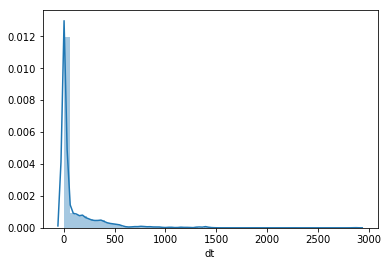

In [19]:
sns.distplot(evet['dt'], kde=True)

In [20]:
import math
log_evet_dt = evet['dt'].apply(lambda x:math.log(1+x))

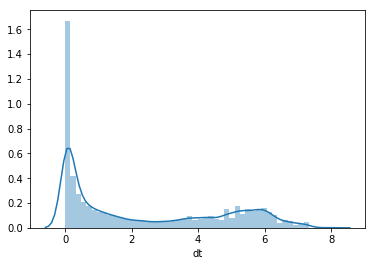

In [21]:
sns.distplot(log_evet_dt, kde=True)

In [22]:
log_evet_dt = log_evet_dt.apply(lambda x:math.log(1+x))

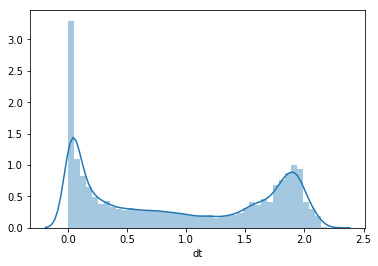

In [23]:
sns.distplot(log_evet_dt, kde=True)

In [1]:
#对数和指数
import math
print(math.log(4))

1.3862943611198906


In [2]:
print(math.exp(1.3862943611198906))

4.0
